Um zwischen **linearer Regression** und **logistischer Regression** zu wählen, ist es entscheidend, die Natur der abhängigen Variable und die Zielstellung der Analyse zu verstehen.

### 1. **Lineare Regression**: 
Die lineare Regression wird verwendet, wenn die abhängige Variable **kontinuierlich** ist und eine lineare Beziehung zwischen der abhängigen und den unabhängigen Variablen besteht. Beispiele:
- Vorhersage des Gehalts basierend auf Berufserfahrung.
- Vorhersage von Temperaturen basierend auf Zeit oder Jahreszeit.



### 2. **Logistische Regression**:
Die logistische Regression wird verwendet, wenn die abhängige Variable **binär oder kategorisch** ist. Das Modell sagt die Wahrscheinlichkeit eines Ereignisses voraus (z.B. 0 oder 1, Ja oder Nein). Typische Beispiele:
- Vorhersage, ob ein Kunde ein Produkt kauft (Ja/Nein).
- Vorhersage, ob ein Patient eine Krankheit hat (Positiv/Negativ).

---

### Kriterien zur Entscheidung:
- **Typ der abhängigen Variable**: 
  - **Kontinuierlich** → Lineare Regression.
  - **Binär/Kategorisch** → Logistische Regression.

<br>

- **Verteilung der abhängigen Variable**:
  - Für lineare Regression sollte die abhängige Variable normalverteilt sein.
  - Für logistische Regression ist dies nicht erforderlich, da es um Wahrscheinlichkeiten geht.

<br>

- **Interpretation der Ergebnisse**:
  - Bei der linearen Regression interpretieren wir direkte Änderungen in $Y$.
  - Bei der logistischen Regression interpretieren wir Änderungen in der Wahrscheinlichkeit eines Ergebnisses.

---
### Beispiel

Wir erstellen ein einfaches Beispiel, das zeigt, wie man zwischen beiden Methoden wählt, basierend auf den Daten. Nehmen wir an, wir haben einen Datensatz, der kontinuierliche und binäre Zielvariablen enthält.


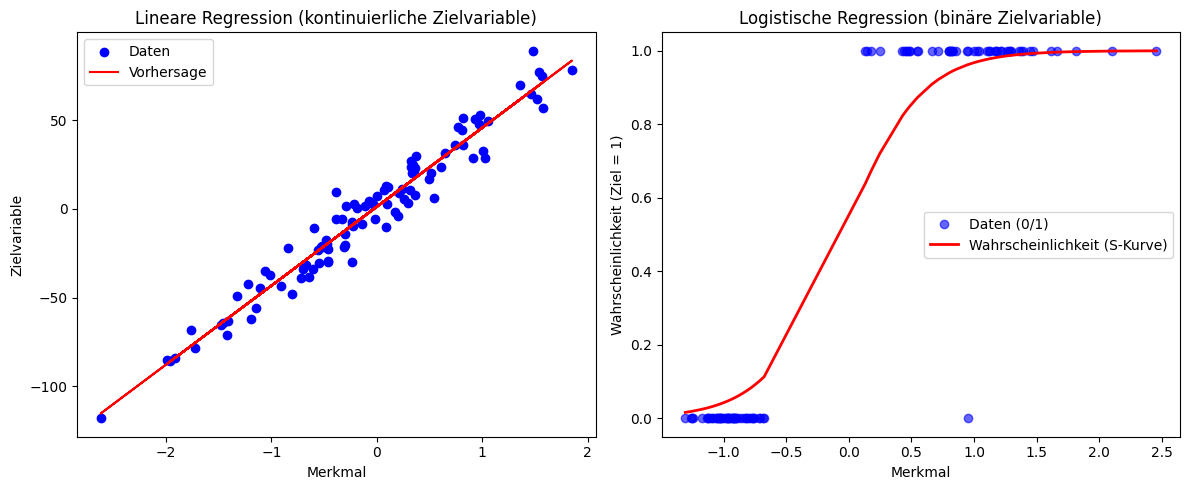

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression

# Simuliere Daten für lineare Regression (kontinuierlich)
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Simuliere Daten für logistische Regression (binär)
X_log, y_log = make_classification(n_samples=100, n_features=1, 
                                   n_informative=1, n_redundant=0, 
                                   n_clusters_per_class=1, random_state=42)

# Lineare Regression trainieren
lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)

# Logistische Regression trainieren
log_reg = LogisticRegression()
log_reg.fit(X_log, y_log)

# Vorhersagen für lineare Regression
y_pred_lin = lin_reg.predict(X_reg)

# Vorhersagewahrscheinlichkeiten für logistische Regression (nur Klasse 1)
y_pred_log_proba = log_reg.predict_proba(X_log)[:, 1]

# Sortiere die Daten für eine glatte Kurve bei der logistischen Regression
sorted_idx = np.argsort(X_log.flatten())
X_log_sorted = X_log[sorted_idx]
y_pred_log_proba_sorted = y_pred_log_proba[sorted_idx]

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot für lineare Regression
ax1.scatter(X_reg, y_reg, color='blue', label='Daten')
ax1.plot(X_reg, y_pred_lin, color='red', label='Vorhersage')
ax1.set_title('Lineare Regression (kontinuierliche Zielvariable)')
ax1.set_xlabel('Merkmal')
ax1.set_ylabel('Zielvariable')
ax1.legend()

# Plot für logistische Regression (mit S-Kurve)
ax2.scatter(X_log, y_log, color='blue', label='Daten (0/1)', alpha=0.6)
ax2.plot(X_log_sorted, y_pred_log_proba_sorted, color='red', label='Wahrscheinlichkeit (S-Kurve)', linewidth=2)
ax2.set_title('Logistische Regression (binäre Zielvariable)')
ax2.set_xlabel('Merkmal')
ax2.set_ylabel('Wahrscheinlichkeit (Ziel = 1)')
ax2.legend()

plt.tight_layout()
plt.show()


### Erläuterung der Visualisierung:
- **Linkes Diagramm**: Die Datenpunkte der linearen Regression werden als blaue Punkte dargestellt, und die rote Linie zeigt das Modell, das eine lineare Beziehung zwischen der unabhängigen und der abhängigen Variablen vorhersagt.
- **Rechtes Diagramm**: Hier sieht man, dass die logistische Regression die Wahrscheinlichkeit vorhersagt, dass die abhängige Variable 1 ist, wobei die rote Kurve eine S-Kurve darstellt.

### Zusammenfassung:
Die Wahl zwischen linearer und logistischer Regression hängt hauptsächlich von der Art der Zielvariable ab. Die lineare Regression wird für kontinuierliche Zielvariablen verwendet, während die logistische Regression für binäre oder kategorische Zielvariablen geeignet ist.